In [1]:
LOCAL=False
import os
import importlib

from nna import weather

# import itertools
import pandas as pd

import numpy as np
import random


In [2]:
importlib.reload(weather)

version_tag='weather_V3'
dataset_version='W3'

FILE_PER_LOCATION=1
TIMESTAMPS_PER_ROW = 4

if LOCAL:
    weather_data_folder='/Users/berk/Downloads/NNA_files/weather_data/2017_2020'
else:
    weather_data_folder='/scratch/enis/data/nna/weather_data/2017_2020'

root_path = '/scratch/enis/data/nna/labeling/samples'



# print('total sample count to be produced:',file_per_location*len(short_ones.keys()))

# 40 Prudhoe or ANWR monitoring sites AND the Ivvavik sites
short_input_csv_headers = ['day_length','air_temp','snow_depth',
        'cloud_fraction','relative_humidity','runoff','rain_precip',
         'snow_precip','wind_direction','wind_speed']
# (year,month,day,hour,day_length,air_temp,snow_depth,
#                 cloud_fraction,relative_humidity,runoff,rain_precip,
#                     snow_precip,wind_direction,wind_speed)=row
# for Dalton and Dempster
long_input_csv_headers = ['day_length','air_temp','snow_depth',
        'cloud_fraction','relative_humidity','runoff','rain_precip',
         'snow_precip','total_precip','wind_direction','wind_speed',
        'snow_blowing_ground','snow_blowing_air']

excell_all_headers = [
    'data_version', 'Annotator', 'Site ID', 'File Name', 'Date', 'Start Time',
    'End Time', 'Length', 'Clip Path', 'Comments', 'weather_timestamp',
    'region', 'day_length', 'air_temp', 'snow_depth', 'cloud_fraction',
    'relative_humidity', 'runoff', 'rain_precip','rain_precip_mm', 'snow_precip',
    'wind_direction', 'wind_speed'
]

# (year,month,day,hour,day_length,air_temp,snow_depth,
# cloud_fraction,relative_humidity,runoff,rain_precip,
# snow_precip,total_precip,wind_direction,wind_speed,
# snow_blowing_ground,snow_blowing_air)=row

short_locations=('prudhoe','ivvavik','anwr')
long_locations=('dalton','dempster')

if LOCAL:
    file_database = '/Users/berk/Documents/scratch/enis/data/nna/database/allFields_dataV10.pkl'
else:
    file_database = '/scratch/enis/data/nna/database/allFields_dataV10.pkl'

In [3]:
def match_weather_and_files(file_properties_df, region, location, fname, short_locations,
                            long_locations, short_input_csv_headers,long_input_csv_headers):
    filtered_files = file_properties_df[file_properties_df['region'] == region]
    filtered_files = filtered_files[filtered_files['locationId'] == location]

    weather_data = weather.load_weather_data(region, location, fname, short_locations,
                                     long_locations, short_input_csv_headers,
                                     long_input_csv_headers)

    # Find the earliest start and end timestamps in weather_data
    earliest_start = weather_data['TIMESTAMP'].min()
    earliest_end = weather_data['TIMESTAMP'].max()

    # Filter the rows of filtered_files dataframe
    filtered_files = filtered_files[
        (filtered_files['timestamp'] >= earliest_start) &
        (filtered_files['timestampEnd'] <= earliest_end)]

    return filtered_files, weather_data



In [4]:
file_properties_df = pd.read_pickle(file_database)
station_csv = weather.csv_path_per_regloc(weather_data_folder)
station_years = weather.year_per_regloc(station_csv,file_properties_df)

In [ ]:

file_per_location=FILE_PER_LOCATION
new_dataset_csv, not_found_rows = [], []
df_per_location=[]
weather_df = []
for (region, location),fname in station_csv.items():
    print('region:',region,'location:',location,'fname:',fname)
    files, weather_rows = match_weather_and_files(file_properties_df,region, location, fname,
                        short_locations, long_locations, short_input_csv_headers,
                        long_input_csv_headers)
    weather_df.append(weather_rows)

# comboine weather dataframes into one
weather_rows = pd.concat(weather_df)


# dataset=pd.concat(df_per_location)


In [6]:
var_of_interest = 'rain_precip_mm'
weather_rows[['TIMESTAMP','location','region',var_of_interest,'wind_speed']]

,TIMESTAMP,location,region,rain_precip_mm,wind_speed
0,2017-09-01 03:00:00,SINP03,ivvavik,0.537216,4.541947
1,2017-09-01 06:00:00,SINP03,ivvavik,0.344915,4.000821
2,2017-09-01 09:00:00,SINP03,ivvavik,0.303550,3.388547
3,2017-09-01 12:00:00,SINP03,ivvavik,0.170113,2.837646
4,2017-09-01 15:00:00,SINP03,ivvavik,0.085189,2.202360
...,...,...,...,...,...
8763,2020-08-31 12:00:00,10,dalton,0.044072,3.563952
8764,2020-08-31 15:00:00,10,dalton,0.008747,3.317840
8765,2020-08-31 18:00:00,10,dalton,0.041975,2.315538
8766,2020-08-31 21:00:00,10,dalton,0.012474,1.770742


In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(weather_rows)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

g = sns.FacetGrid(df, col="location", height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='TIMESTAMP', y='rain_precip_mm', hue='region')

g.set_axis_labels('Timestamp', 'Rain Precipitation (mm)')
g.set_titles(col_template="{col_name}")
plt.suptitle('Rain Precipitation Trends Over Time', y=1.05)
plt.show()


In [20]:
weather_rows[['TIMESTAMP','location','region',var_of_interest,]]

,TIMESTAMP,location,region,rain_precip_mm
0,2017-09-01 03:00:00,SINP03,ivvavik,0.537216
1,2017-09-01 06:00:00,SINP03,ivvavik,0.344915
2,2017-09-01 09:00:00,SINP03,ivvavik,0.303550
3,2017-09-01 12:00:00,SINP03,ivvavik,0.170113
4,2017-09-01 15:00:00,SINP03,ivvavik,0.085189
...,...,...,...,...
8763,2020-08-31 12:00:00,10,dalton,0.044072
8764,2020-08-31 15:00:00,10,dalton,0.008747
8765,2020-08-31 18:00:00,10,dalton,0.041975
8766,2020-08-31 21:00:00,10,dalton,0.012474


In [10]:
weather_rows.groupby(['location','region']).mean()

,,day_length,air_temp,snow_depth,cloud_fraction,relative_humidity,runoff,rain_precip,snow_precip,wind_direction,wind_speed,rain_precip_mm,total_precip,snow_blowing_ground,snow_blowing_air
location,region,,,,,,,,,,,,,,
01,dalton,12.008124,0.339559,0.086460,0.673855,76.022065,0.000182,0.000148,0.000057,148.431897,1.499893,0.147533,0.000204,0.000000,0.121026
02,dalton,12.008492,-2.811435,0.123048,0.684971,79.345612,0.000164,0.000125,0.000077,134.827340,1.363436,0.124600,0.000201,0.000000,0.126938
03,dalton,12.008982,-2.820760,0.126029,0.687606,78.515781,0.000142,0.000108,0.000069,142.553409,1.344253,0.108010,0.000177,0.000000,0.118644
04,dalton,12.009377,-3.390293,0.145463,0.679793,77.838375,0.000155,0.000115,0.000080,146.179770,1.411443,0.114695,0.000195,0.000000,0.139900
05,dalton,12.010535,-3.295030,0.252508,0.659313,74.147296,0.000194,0.000116,0.000082,132.875975,3.142592,0.115871,0.000198,0.000043,0.314879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SINP06,ivvavik,12.011762,-8.163532,0.258383,0.660363,80.186440,0.000186,0.000089,0.000109,222.384300,3.280459,0.088546,NaN,NaN,NaN
SINP07,ivvavik,12.011635,-4.807728,0.172739,0.659140,75.254353,0.000160,0.000111,0.000054,217.278560,3.163972,0.111147,NaN,NaN,NaN
SINP08,ivvavik,12.010059,-6.735670,0.206491,0.656746,77.213487,0.000183,0.000111,0.000078,213.281744,3.083774,0.110848,NaN,NaN,NaN


In [143]:
%matplotlib inline

In [16]:
weather_rows['rainbywind']=weather_rows['rain_precip_mm']/weather_rows['wind_speed']

In [146]:
w_filter_wind=weather_rows[(weather_rows['rain_precip_mm']/weather_rows['wind_speed'])<10]

In [57]:
# [['region','location','TIMESTAMP','rain_precip_mm','wind_speed','rainbywind']]
weather_rows[(weather_rows['rain_precip_mm']>=1.5) & (weather_rows['wind_speed']<=2.5) & ((weather_rows['rainbywind']>15))][['region','location','TIMESTAMP','rain_precip_mm','wind_speed','rainbywind']].sort_values(by='rainbywind',ascending=False)

,region,location,TIMESTAMP,rain_precip_mm,wind_speed,rainbywind
8270,anwr,35,2020-06-30 21:00:00,4.524004,0.100000,45.240037
2550,anwr,39,2018-07-16 21:00:00,4.207575,0.106688,39.438078
2550,anwr,40,2018-07-16 21:00:00,3.693578,0.100000,36.935778
8270,anwr,34,2020-06-30 21:00:00,4.510333,0.126112,35.764548
8104,dempster,11,2020-06-10 03:00:00,3.448887,0.100000,34.488868
5552,dalton,02,2019-07-27 03:00:00,3.203866,0.100000,32.038656
5004,dalton,01,2019-05-19 15:00:00,5.625906,0.211077,26.653321
8535,dalton,01,2020-08-03 00:00:00,5.104847,0.210532,24.247387
5543,dempster,12,2019-07-26 00:00:00,4.221977,0.177597,23.772853
2550,anwr,46,2018-07-16 21:00:00,3.810598,0.173244,21.995529


In [ ]:
178102,235365,3310,33,0
0,  ,0.1    2.5, 10, 25

In [155]:
# w_filter_wind[w_filter_wind['rain_precip_mm']>10]

In [ ]:
# CORRECTed
# /tank/data/nna/real/ivvavik/SINP03/2019/SINP-03_20190713_210000.flac    NO RAIN 0
# /tank/data/nna/real/ivvavik/SINP07/2019/SINP-07_20190713_063000.flac   (6am)  0.0025  (9am) 0.0175
# /tank/data/nna/real/ivvavik/SINP07/2019/SINP-07_20190715_043000.flac    3am      1.4, 6am  0.981920
# /tank/data/nna/real/ivvavik/SINP07/2019/SINP-07_20190715_131602.flac   12pm      4.8   3pm 5.7
# /tank/data/nna/real/ivvavik/SINP02/2019/SINP-02_20190624_234602.flac   (9pm)     3.5  (11.59pm) 12

# /tank/data/nna/real/dempster/22/2019/S4A10434_20190711_060000.flac    (6am)      7.4  wind=1.4
# /tank/data/nna/real/dempster/24/2019/S4A10371_20190711_060000.flac    (6am) rain 8.4 wind  1.2, I can hear slight noise of rain but no drops
# /tank/data/nna/real/dempster/24/2020/S4A10371_20200802_180000.flac    (6pm  rain 9.67 wind 3.84,  
# /tank/data/nna/real/dalton/01/2019/S4A10407_20190608_061832.flac      (6am) rain 1.7	wind 0.10   I do not hear any rain, still slight noise

In [47]:
data[['region','location','TIMESTAMP','rain_precip_mm','wind_speed','rainbywind']]

,region,location,TIMESTAMP,rain_precip_mm,wind_speed,rainbywind
8528,dempster,24,2020-08-02 03:00:00,0.009392,1.161462,0.008086
8529,dempster,24,2020-08-02 06:00:00,0.249496,1.508626,0.165380
8530,dempster,24,2020-08-02 09:00:00,0.533019,4.273382,0.124730
8531,dempster,24,2020-08-02 12:00:00,2.170749,5.915933,0.366933
8532,dempster,24,2020-08-02 15:00:00,10.135260,6.078938,1.667275
8533,dempster,24,2020-08-02 18:00:00,9.674762,3.845878,2.515619
8534,dempster,24,2020-08-02 21:00:00,0.111047,2.967865,0.037416
8535,dempster,24,2020-08-03 00:00:00,0.000000,3.541780,0.000000
8528,prudhoe,24,2020-08-02 03:00:00,0.053159,4.225540,0.012580
8529,prudhoe,24,2020-08-02 06:00:00,0.017999,4.330289,0.004157


0
(1, 1)


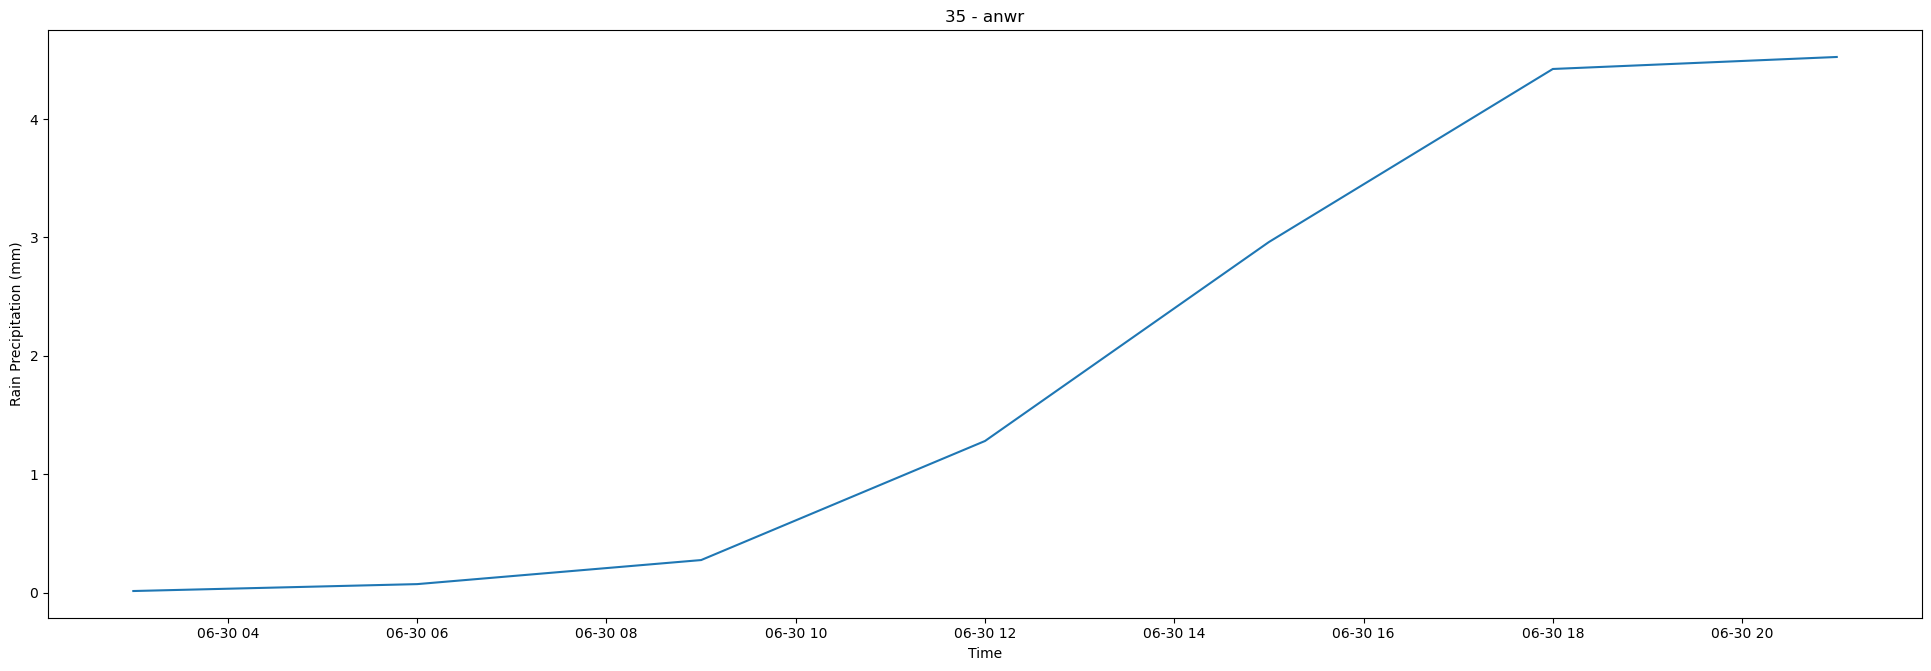

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
# dempster	17	2019-07-11 00:00:00
# dempster	24	2019-07-11 03:00:00	12.326330
# dempster	24	2020-08-02 15:00:00	
# anwr	35	2020-06-30 21:00:00	
weather_rows2 = weather_rows[weather_rows['location'].isin(['35'])].copy()
# Assuming your data is stored in a CSV file called 'data.csv'
data = weather_rows2

# Convert the 'TIMESTAMP' column to a datetime object
# data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
# Define the start and end dates for the desired range
start_date = pd.Timestamp('2020-06-30 01:00:00')
end_date = pd.Timestamp('2020-06-30 23:00:00')


# Filter the data to include only rows within the specified date range
data = data[(data['TIMESTAMP'] >= start_date) & (data['TIMESTAMP'] <= end_date)]
print(data[data['rain_precip_mm']>10].shape[0])

# Group the data by 'location' and 'region' and create a list of unique combinations
location_region_combinations = data[['location', 'region']].drop_duplicates().values.tolist()

# Calculate the number of rows and columns for the grid
grid_rows = int(len(location_region_combinations) ** 0.5)
grid_cols = len(location_region_combinations) // grid_rows + (len(location_region_combinations) % grid_rows > 0)

# Create the main plot figure
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(20, 7), sharex=True, sharey=True)
fig.tight_layout(pad=3.0)
try:
    
    print(axes[0,0])
    print('asd')
except:
    axes = np.array([axes]).reshape(1, -1)
print(axes.shape)

# Check if axes is 1-dimensional or 2-dimensional

# Iterate through the unique combinations and create subplots
for i, (location, region) in enumerate(location_region_combinations):
    row = (i // grid_cols)
    col = (i % grid_cols)
    
    # Filter the data for the current location and region
    subset = data[(data['location'] == location) & (data['region'] == region)]

    # Plot the 'rain_precip_mm' over time on the corresponding subplot
    axes[row, col].plot(subset['TIMESTAMP'], subset['rain_precip_mm'])
    axes[row, col].set_title(f'{location} - {region}')
    axes[row, col].set_xlabel('Time')
    axes[row, col].set_ylabel('Rain Precipitation (mm)')

# Display the plot
plt.show()


In [32]:
axes[1,0]

<AxesSubplot:>

In [101]:
axes[1,1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [19]:
weather_rows['rain_precip_mm'].describe()

count    648832.000000
mean          0.097085
std           0.382036
min           0.000000
25%           0.000000
50%           0.000000
75%           0.017921
max          15.654719
Name: rain_precip_mm, dtype: float64

In [21]:
thresholds=[0.0, 0.012547634450000001, 0.0796103632]
bins=[-float('inf')] + thresholds + [float('inf')]


[-inf, 0.0, 0.012547634450000001, 0.0796103632, inf]

In [22]:
bins

[-inf, 0.0, 0.012547634450000001, 0.0796103632, inf]